In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
y_train = y_train.reshape(-1,)

In [4]:
y_test = y_test.reshape(-1,)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_picture(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

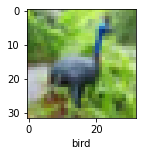

In [7]:
plot_picture(X_train, y_train, 6)

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [10]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4630 - accuracy: 0.4750
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1189 - accuracy: 0.6064
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9949 - accuracy: 0.6531
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9122 - accuracy: 0.6823
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8476 - accuracy: 0.7044
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7874 - accuracy: 0.7260
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7382 - accuracy: 0.7435
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6931 - accuracy: 0.7584
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6520 - accuracy: 0.7725
Epoch 10/10
1563/1563 [==============================] - 60s 39m

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.9402 - accuracy: 0.6970


[0.940188467502594, 0.6970000267028809]

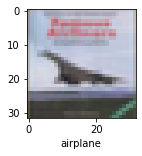

In [20]:
plot_picture(X_test, y_test,3)

In [22]:
y_pred = cnn.predict(X_test)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]

In [25]:
classes[y_classes[3]]

'airplane'